# NY Restaurant Inspections

Goals<br>
You have been provided with a dataset containing inspection ratings for NYC restaurants. The structure of the files are normalized and contain various attributes regarding the restaurants and their inspections.
By design, this is an open-ended analysis. Feel free to identify trends, draw insights and recommendations (think: customer and/or inspector perspective). You are welcome to use any number of tools that you have at your disposal to complete this analysis. Because this is open-ended it is feasible that an analysis can take days if not weeks to consider all angles but for the sake of everyone's time we do not expect you spend more than 4 hours working on this. Remember that the purpose of this is to showcase your analytical skills. Please provide documentation of code cleaning and analysis (any code, scratch work, etc) - more info the better. This is great way for us to understand how you are thinking through the project.
Be as creative as you'd like but please be prudent with your time.<br><br>
Some assumptions about the project<br>
1. Potential customers would prefer to not get sick from the food they eat. But completely avoiding lower-grade restaurants might be an oversimplification. There are some tradeoffs to be considered here.<br>
2. There are a limited number of inspectors and inspections take time. Therefore the number of inspections is also limited.
3. Your stakeholders are looking to you for context and recommendations.<br>

# Import Packages

In [1]:
# import your packages you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import re 
%matplotlib inline

# Set up dataframe (import, concatenate, set index)

In [73]:
# use pandas to import data, this is a txt file but still takes commas as separates
part1=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', sep=',', index_col=0)
part2=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_2_of_6.txt', sep=',', index_col=0)
part3=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_3_of_6.txt', sep=',', index_col=0)
part4=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_4_of_6.txt', sep=',', index_col=0)
part5=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_5_of_6.txt', sep=',', index_col=0)
part6=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_6_of_6.txt', sep=',', index_col=0)
#concatenate these together
restos=pd.concat([part1, part2, part3, part4, part5, part6])


In [74]:
restos.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [75]:
restos['CAMIS'].nunique()

26505

In [77]:
#convert to date time 
restos['INSPECTION DATE']=pd.to_datetime(restos['INSPECTION DATE'])
restos['RECORD DATE']=pd.to_datetime(restos['RECORD DATE'])

In [78]:
restos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399918 entries, 0 to 399917
Data columns (total 18 columns):
CAMIS                    399918 non-null int64
DBA                      399559 non-null object
BORO                     399918 non-null object
BUILDING                 399809 non-null object
STREET                   399909 non-null object
ZIPCODE                  399909 non-null float64
PHONE                    399913 non-null object
CUISINE DESCRIPTION      399918 non-null object
INSPECTION DATE          399918 non-null datetime64[ns]
ACTION                   398783 non-null object
VIOLATION CODE           393414 non-null object
VIOLATION DESCRIPTION    392939 non-null object
CRITICAL FLAG            399918 non-null object
SCORE                    376704 non-null float64
GRADE                    195413 non-null object
GRADE DATE               192820 non-null object
RECORD DATE              399918 non-null datetime64[ns]
INSPECTION TYPE          398783 non-null object
dtypes: 

In [79]:
restos.isna().sum()

CAMIS                         0
DBA                         359
BORO                          0
BUILDING                    109
STREET                        9
ZIPCODE                       9
PHONE                         5
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1135
VIOLATION CODE             6504
VIOLATION DESCRIPTION      6979
CRITICAL FLAG                 0
SCORE                     23214
GRADE                    204505
GRADE DATE               207098
RECORD DATE                   0
INSPECTION TYPE            1135
dtype: int64

Data should be set as multi index and also multiple rows per CAMIS for analysis, hence we can track how the scores change over time. That being said we should then sort by both the ID and inspection date

In [80]:
#sort by both the id and the inspection date
restos=restos.sort_values(['CAMIS', 'INSPECTION DATE'])

In [81]:
restos.head(10)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
78213,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2015-02-09,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,2017-08-28,Cycle Inspection / Initial Inspection
39514,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2016-02-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,2017-08-28,Cycle Inspection / Initial Inspection
399105,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2016-02-18,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,2017-08-28,Cycle Inspection / Initial Inspection
123432,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2017-05-18,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,2017-08-28,Cycle Inspection / Initial Inspection
351671,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2017-05-18,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,2017-08-28,Cycle Inspection / Initial Inspection
140332,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-07-01,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,23.0,B,07/01/2014,2017-08-28,Cycle Inspection / Re-inspection
293470,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-07-01,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,23.0,B,07/01/2014,2017-08-28,Cycle Inspection / Re-inspection
329599,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-07-01,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,23.0,B,07/01/2014,2017-08-28,Cycle Inspection / Re-inspection
128808,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-11-13,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,14.0,NaN,NaN,2017-08-28,Cycle Inspection / Initial Inspection
160002,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-11-13,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,14.0,NaN,NaN,2017-08-28,Cycle Inspection / Initial Inspection


In [82]:
#drop duplicates by CAMIS to understand locations
locations=restos.drop_duplicates(subset=['CAMIS'], keep='first')

In [83]:
locations.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
78213,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2015-02-09,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,2017-08-28,Cycle Inspection / Initial Inspection
140332,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-07-01,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,23.0,B,07/01/2014,2017-08-28,Cycle Inspection / Re-inspection
123603,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2014-09-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,09/06/2014,2017-08-28,Cycle Inspection / Initial Inspection
5523,40356018,RIVIERA CATERERS,BROOKLYN,2780,STILLWELL AVENUE,11224.0,7183723031,American,2015-06-05,Violations were cited in the following area(s).,09A,Canned food product observed dented and not se...,Not Critical,4.0,A,06/05/2015,2017-08-28,Cycle Inspection / Initial Inspection
41645,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369.0,7183350505,American,2014-10-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaN,2017-08-28,Cycle Inspection / Initial Inspection


In [84]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26505 entries, 78213 to 77357
Data columns (total 18 columns):
CAMIS                    26505 non-null int64
DBA                      26146 non-null object
BORO                     26505 non-null object
BUILDING                 26485 non-null object
STREET                   26496 non-null object
ZIPCODE                  26496 non-null float64
PHONE                    26500 non-null object
CUISINE DESCRIPTION      26505 non-null object
INSPECTION DATE          26505 non-null datetime64[ns]
ACTION                   25370 non-null object
VIOLATION CODE           24542 non-null object
VIOLATION DESCRIPTION    24505 non-null object
CRITICAL FLAG            26505 non-null object
SCORE                    23990 non-null float64
GRADE                    11385 non-null object
GRADE DATE               10769 non-null object
RECORD DATE              26505 non-null datetime64[ns]
INSPECTION TYPE          25370 non-null object
dtypes: datetime64[ns](2

# EDA to understand data

In [85]:
#first, group by borough
locations.groupby('BORO').count()

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
BORO,,,,,,,,,,,,,,,,,
BRONX,2394,2364,2393,2394,2394,2394,2394,2394,2323,2249,2245,2394,2193,1144,1099,2394,2323
BROOKLYN,6524,6432,6524,6524,6524,6521,6524,6524,6223,6016,6010,6524,5844,2627,2433,6524,6223
MANHATTAN,10643,10519,10638,10643,10643,10643,10643,10643,10168,9806,9787,10643,9629,4742,4534,10643,10168
Missing,9,6,0,0,0,9,9,9,0,0,0,9,0,0,0,9,0
QUEENS,5982,5890,5977,5982,5982,5981,5982,5982,5742,5582,5574,5982,5453,2448,2305,5982,5742
STATEN ISLAND,953,935,953,953,953,952,953,953,914,889,889,953,871,424,398,953,914


In [28]:
#group by grade
restos.groupby('GRADE').count()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE DATE,RECORD DATE,INSPECTION TYPE
GRADE,,,,,,,,,,,,,,,,
A,154194,154194,154141,154194,154194,154194,154194,154194,154193,153417,153253,154194,154191,154193,154194,154193
B,28166,28166,28164,28166,28166,28166,28166,28166,28166,28165,28143,28166,28166,28166,28166,28166
C,6992,6992,6992,6992,6992,6992,6992,6992,6992,6963,6956,6992,6992,6992,6992,6992
Not Yet Graded,2598,2598,2598,2598,2598,2598,2598,2598,2598,2577,2571,2598,2597,6,2598,2598
P,1359,1359,1359,1359,1359,1359,1359,1359,1359,1279,1279,1359,1359,1359,1359,1359
Z,2104,2104,2101,2104,2104,2104,2104,2104,2104,2061,2058,2104,2104,2104,2104,2104


In [86]:
#check out how many zip codes
locations['ZIPCODE'].nunique()

233

In [31]:
restos['ACTION'].unique()

array(['Violations were cited in the following area(s).',
       'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.',
       'Establishment re-opened by DOHMH', nan,
       'No violations were recorded at the time of this inspection.',
       'Establishment re-closed by DOHMH'], dtype=object)

In [32]:
#how many types of cuisine
restos['CUISINE DESCRIPTION'].nunique()

84

In [33]:
restos['CUISINE DESCRIPTION'].unique()

array(['Italian', 'Chinese', 'American', 'Pakistani', 'Japanese',
       'Caribbean', 'Seafood', 'Pizza', 'Indian', 'Soul Food', 'Mexican',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'Bagels/Pretzels', 'Steak', 'Korean', 'Tapas', 'Chinese/Japanese',
       'Hamburgers', 'Vegetarian', 'Turkish', 'African', 'Spanish',
       'CafÃ©/Coffee/Tea', 'Greek', 'Bakery', 'Continental', 'Brazilian',
       'Mediterranean', 'Salads', 'Thai', 'Asian', 'Pizza/Italian',
       'Donuts', 'Delicatessen', 'Jewish/Kosher', 'Sandwiches', 'Russian',
       'Vietnamese/Cambodian/Malaysia', 'Other',
       'Sandwiches/Salads/Mixed Buffet', 'Peruvian', 'Tex-Mex',
       'Bottled beverages, including water, sodas, juices, etc.', 'Irish',
       'French', 'German', 'Ice Cream, Gelato, Yogurt, Ices',
       'Middle Eastern', 'Juice, Smoothies, Fruit Salads', 'Chicken',
       'Australian', 'Bangladeshi', 'Creole', 'Hotdogs', 'Soups',
       'Hotdogs/Pretzels', 'English', 'H

In [87]:
descriptions=pd.crosstab(locations['CUISINE DESCRIPTION'], locations['BORO'], margins = True)
descriptions

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,All
CUISINE DESCRIPTION,,,,,,,
Afghan,0,2,4,0,10,0,16
African,31,15,20,0,4,1,71
American,439,1297,3130,1,1020,220,6107
Armenian,1,9,17,0,8,1,36
Asian,5,76,151,0,125,10,367
Australian,0,3,12,0,1,0,16
Bagels/Pretzels,4,43,67,0,46,13,173
Bakery,72,197,235,0,204,20,728
Bangladeshi,5,8,7,0,18,0,38


In [35]:
pd.crosstab(restos['BORO'], restos['CRITICAL FLAG'], margins = True)

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
BORO,,,,
BRONX,19027,575,15293,34895
BROOKLYN,54030,1968,43600,99598
MANHATTAN,88496,2672,68406,159574
Missing,0,9,0,9
QUEENS,50945,1560,39910,92415
STATEN ISLAND,7584,195,5648,13427
All,220082,6979,172857,399918


In [36]:
pd.crosstab(restos['BORO'], restos['CRITICAL FLAG'], margins = True)

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
BORO,,,,
BRONX,19027,575,15293,34895
BROOKLYN,54030,1968,43600,99598
MANHATTAN,88496,2672,68406,159574
Missing,0,9,0,9
QUEENS,50945,1560,39910,92415
STATEN ISLAND,7584,195,5648,13427
All,220082,6979,172857,399918


In [43]:
pd.crosstab(restos['BORO'], restos['GRADE'], margins = True)

GRADE,A,B,C,Not Yet Graded,P,Z,All
BORO,,,,,,,
BRONX,13642,2790,682,225,163,168,17670
BROOKLYN,37354,6881,1694,771,377,500,47577
MANHATTAN,61949,10826,2732,856,470,849,77682
QUEENS,36014,6739,1684,633,306,486,45862
STATEN ISLAND,5235,930,200,113,43,101,6622
All,154194,28166,6992,2598,1359,2104,195413


In [44]:
res_xtab=pd.crosstab(restos['BORO'], restos['GRADE'])
res_xtab

GRADE,A,B,C,Not Yet Graded,P,Z
BORO,,,,,,
BRONX,13642,2790,682,225,163,168
BROOKLYN,37354,6881,1694,771,377,500
MANHATTAN,61949,10826,2732,856,470,849
QUEENS,36014,6739,1684,633,306,486
STATEN ISLAND,5235,930,200,113,43,101


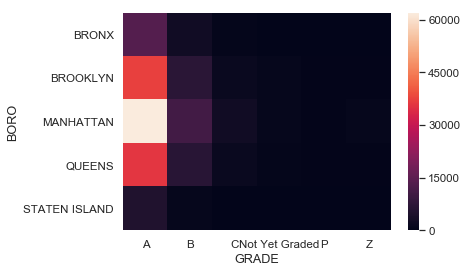

In [45]:
ax = sns.heatmap(res_xtab)

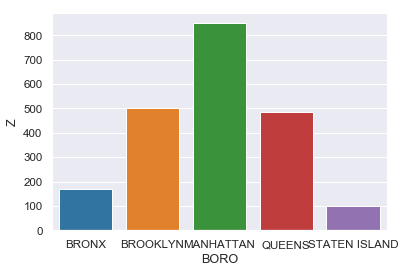

In [65]:
sns.barplot(x=res_xtab.index,y='Z', data=res_xtab)

In [39]:
pd.crosstab(restos['GRADE'], restos['CRITICAL FLAG'], margins = True)

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
GRADE,,,,
A,75125,941,78128,154194
B,19178,23,8965,28166
C,4700,36,2256,6992
Not Yet Graded,1601,27,970,2598
P,329,80,950,1359
Z,1219,46,839,2104
All,102152,1153,92108,195413


In [40]:
#use random forest to predict grade if A,B,C
#linear regressionn to predict score?
pd.crosstab(restos['VIOLATION CODE'], restos['CRITICAL FLAG'], margins = True)

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
VIOLATION CODE,,,,
02A,288,0,0,288
02B,19650,0,0,19650
02C,475,0,0,475
02D,40,0,0,40
02E,4,0,0,4
02F,7,0,0,7
02G,27852,0,0,27852
02H,4177,0,0,4177
02I,157,0,0,157


In [16]:
gradedata=pd.DataFrame(restos.groupby('GRADE')['SCORE'].mean())
gradedata

,SCORE
GRADE,
A,9.799975
B,20.372577
C,35.904176
Not Yet Graded,34.442049
P,6.645327
Z,24.961977


In [71]:
restos['GRADE DATE'].unique()

array([nan, '06/22/2017', '06/14/2017', ..., '05/23/2013', '03/02/2014',
       '03/11/2013'], dtype=object)

# An interesting find here
2 types of grade pending: P for pending a re-opening following a closure, and Z for grade pending. Those with grade Z have higher scores vs grade P and those with grade P have the lowest average score of all (across boroughs)

In [67]:
groupedata=pd.DataFrame(restos.groupby(['GRADE', 'BORO'])['SCORE'].mean())
groupedata

SCORE
GRADE          BORO                    
A              BRONX           9.699802
               BROOKLYN        9.839553
               MANHATTAN       9.782531
               QUEENS          9.801716
               STATEN ISLAND   9.973066
B              BRONX          20.238351
               BROOKLYN       20.271763
               MANHATTAN      20.437188
               QUEENS         20.423802
               STATEN ISLAND  20.397849
C              BRONX          36.348974
               BROOKLYN       34.869540
               MANHATTAN      36.318448
               QUEENS         36.213777
               STATEN ISLAND  34.885000
Not Yet Graded BRONX          35.075556
               BROOKLYN       34.867704
               MANHATTAN      33.922807
               QUEENS         34.309637
               STATEN ISLAND  34.946903
P              BRONX           6.705521
               BROOKLYN        6.835544
               MANHATTAN       6.631915
               QUEENS          6.035948
               STATEN ISLAND   9.232558
Z              BRONX          22.892857
               BROOKLYN       23.006000
               MANHATTAN      26.189635
               QUEENS         25.166667
               STATEN ISLAND  26.782178

In [49]:
groupedata.index

MultiIndex(levels=[['A', 'B', 'C', 'Not Yet Graded', 'P', 'Z'], ['BRONX', 'BROOKLYN', 'MANHATTAN', 'Missing', 'QUEENS', 'STATEN ISLAND']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 4, 5, 0, 1, 2, 4, 5, 0, 1, 2, 4, 5, 0, 1, 2, 4, 5, 0, 1, 2, 4, 5, 0, 1, 2, 4, 5]],
           names=['GRADE', 'BORO'])

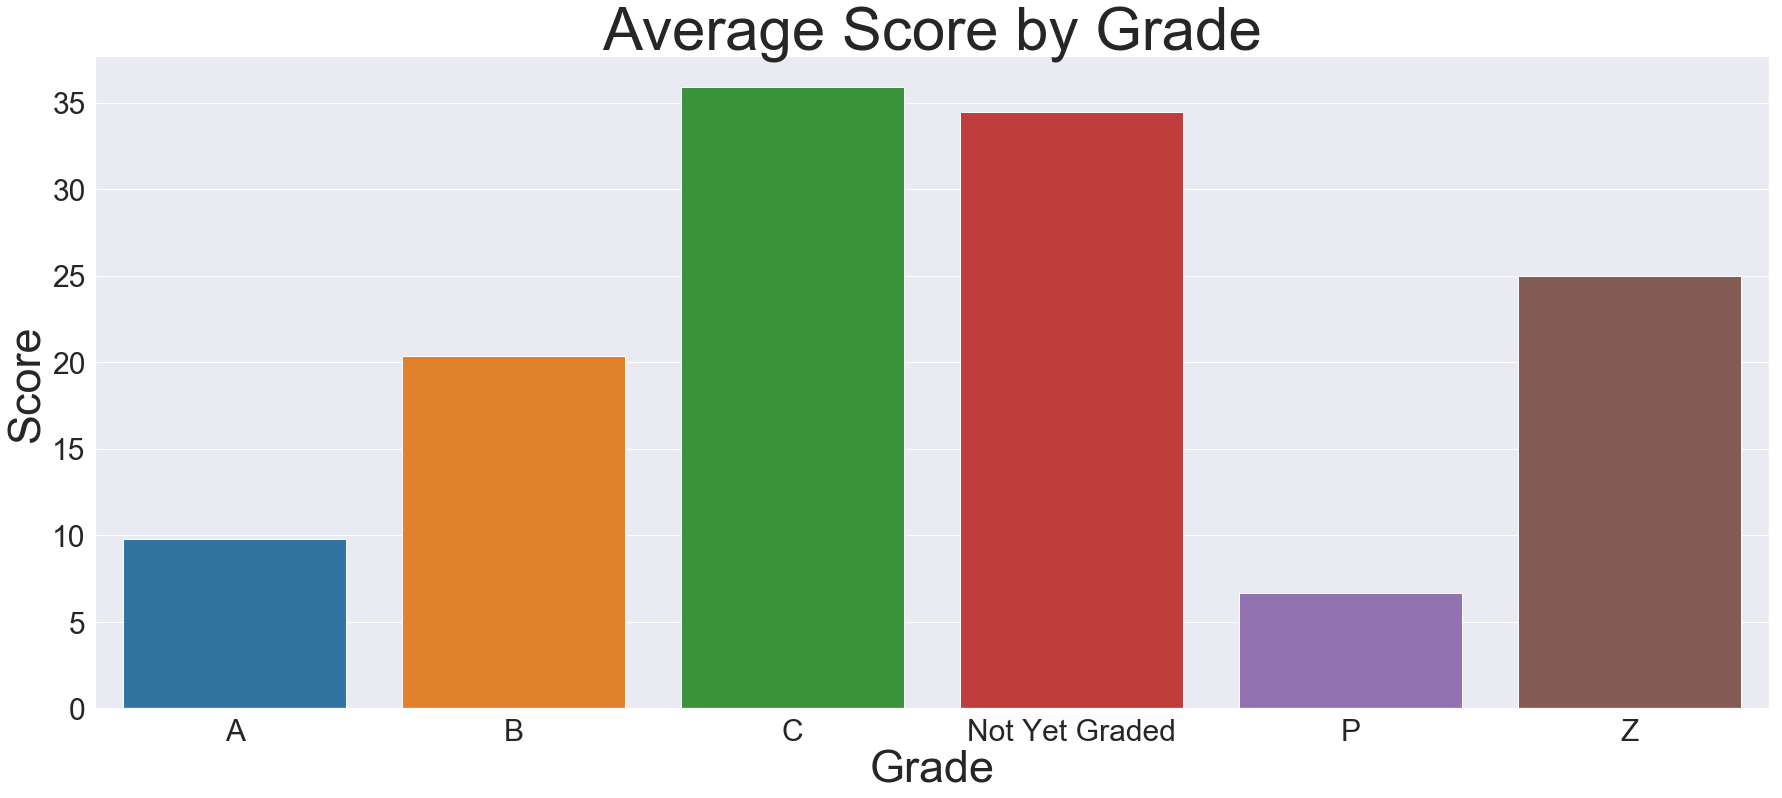

In [52]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x=gradedata.index,y='SCORE', data=gradedata)
ax.set_title("Average Score by Grade", fontsize=60)
ax.set_xlabel("Grade", fontsize=45)
ax.set_ylabel("Score", fontsize=45)
ax.tick_params(labelsize=30)
#plt.savefig("startups_byyear.png")

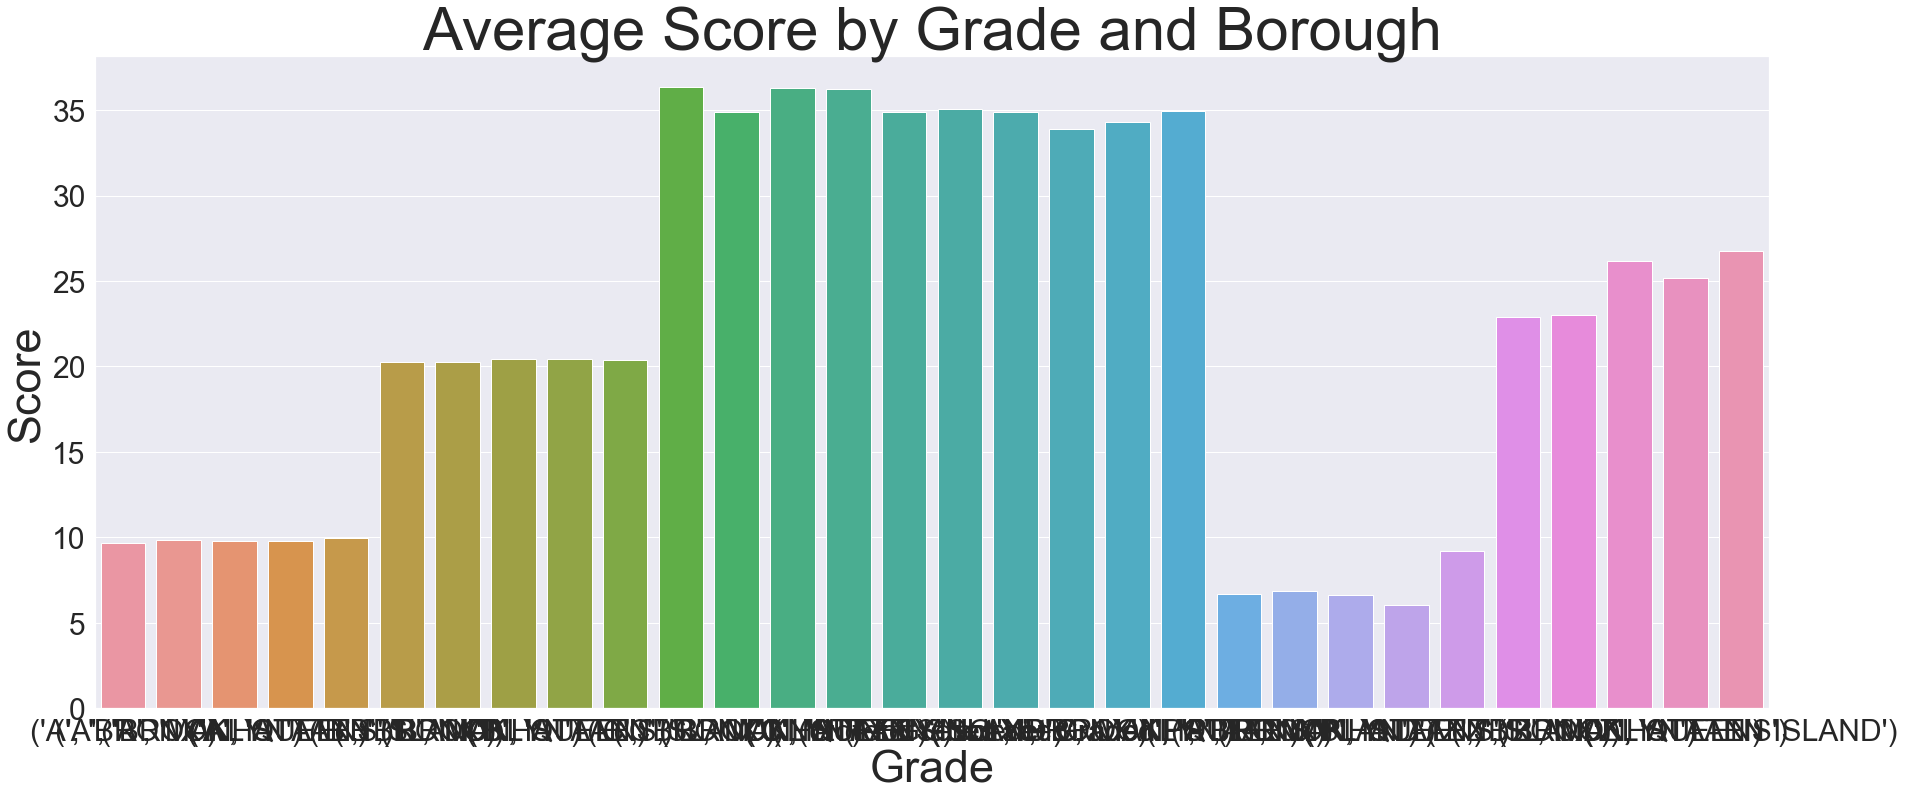

In [69]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x=groupedata.index,y='SCORE', data=groupedata)
ax.set_title("Average Score by Grade and Borough", fontsize=60)
ax.set_xlabel("Grade", fontsize=45)
ax.set_ylabel("Score", fontsize=45)
ax.tick_params(labelsize=30)
#plt.savefig("startups_byyear.png")

In [47]:
#pd.DataFrame(restos.groupby(['GRADE', 'BORO'])['SCORE'].count())

In [46]:
pd.crosstab(restos['BORO'], restos['GRADE'])

GRADE,A,B,C,Not Yet Graded,P,Z
BORO,,,,,,
BRONX,13642,2790,682,225,163,168
BROOKLYN,37354,6881,1694,771,377,500
MANHATTAN,61949,10826,2732,856,470,849
QUEENS,36014,6739,1684,633,306,486
STATEN ISLAND,5235,930,200,113,43,101


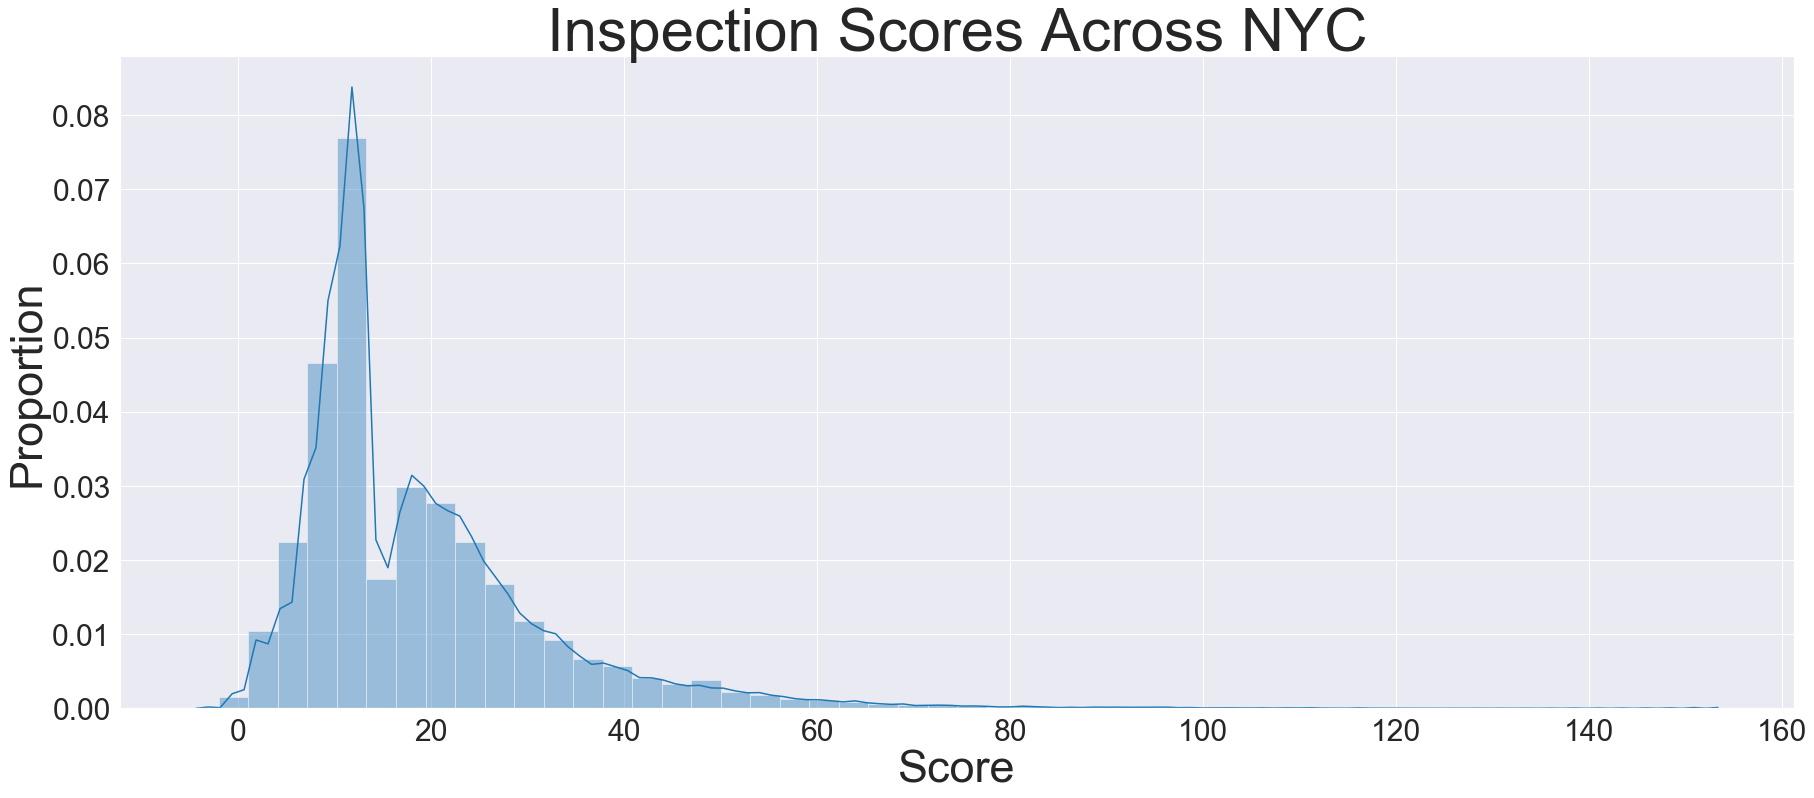

In [60]:
#have to drop missings first then make into distplot
score=restos['SCORE'].dropna()
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.distplot(score)
ax.set_title("Inspection Scores Across NYC", fontsize=60)
ax.set_xlabel("Score", fontsize=45)
ax.set_ylabel("Proportion", fontsize=45)
ax.tick_params(labelsize=30)
#plt.savefig("startups_byyear.png")

In [93]:
#locations of zip code and score
restos.groupby('ZIPCODE').mean().head()

,CAMIS,SCORE
ZIPCODE,,
10001.0,4.445788e+07,18.908554
10002.0,4.518074e+07,19.714524
10003.0,4.380698e+07,19.252150
10004.0,4.395996e+07,16.546597
10005.0,4.374306e+07,18.839196


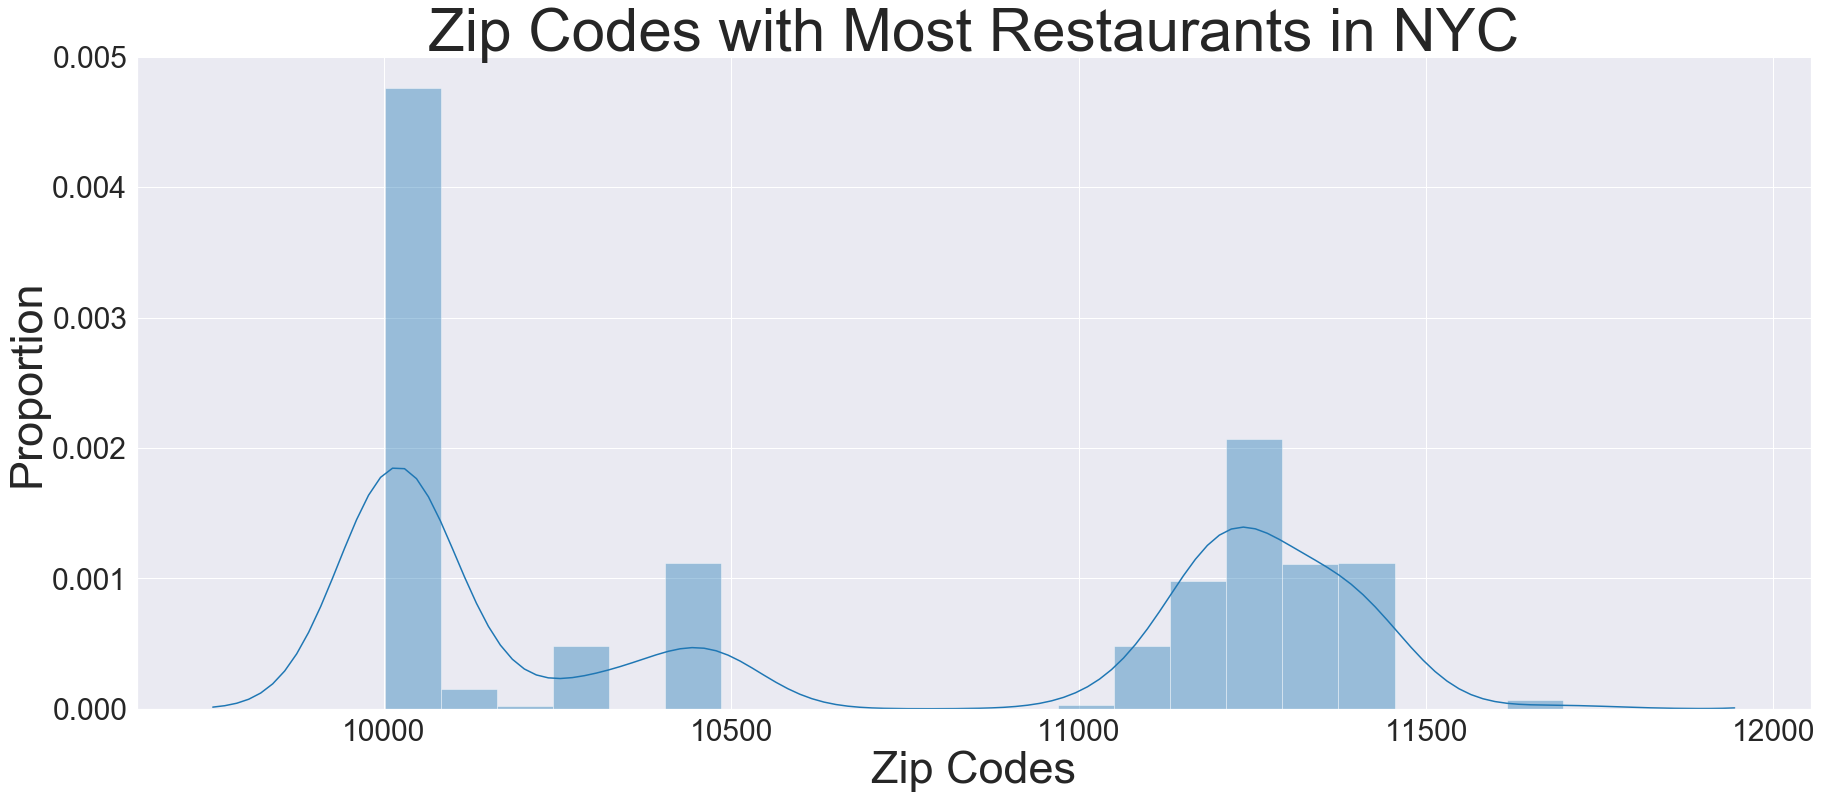

In [97]:
#histograms of zip codes
#have to drop missings first then make into distplot
zips=locations['ZIPCODE'].dropna()
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.distplot(zips)
ax.set_title("Zip Codes with Most Restaurants in NYC", fontsize=60)
ax.set_xlabel("Zip Codes", fontsize=45)
ax.set_ylabel("Proportion", fontsize=45)
ax.tick_params(labelsize=30)
#plt.savefig("startups_byyear.png")

In [102]:
#which zip codes are the most common
locations.groupby('ZIPCODE').count().sort_values(by='CAMIS', ascending=False)

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
ZIPCODE,,,,,,,,,,,,,,,,,
10019.0,702,693,702,701,702,702,702,702,673,651,649,702,634,356,344,702,673
10003.0,699,696,699,699,699,699,699,699,678,653,652,699,625,299,288,699,678
10036.0,623,616,623,623,623,623,623,623,596,579,579,623,562,293,285,623,596
10013.0,513,507,513,512,513,513,513,513,493,467,464,513,461,208,193,513,493
10002.0,498,489,498,498,498,498,498,498,467,457,456,498,438,176,160,498,467
10001.0,495,493,495,494,495,495,495,495,477,455,455,495,457,246,236,495,477
10011.0,481,478,481,481,481,481,481,481,459,440,437,481,432,202,193,481,459
10022.0,469,465,469,469,469,469,469,469,455,441,440,469,428,208,203,469,455
10016.0,438,433,438,438,438,438,438,438,413,401,400,438,398,166,160,438,413
